In [1]:
!python3 -m pip install --upgrade word2number

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from word2number import w2n
import math

In [19]:
data = pd.read_csv('hiring.csv')
data.columns = ["experience", "test_scores", "interview_score", "salary"]
data.head()

,experience,test_scores,interview_score,salary
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000


In [20]:
# data.experience = data.experience.fillna( math.floor( data.experience.mean() ) )
data.experience = data.experience.fillna( 'zero' )
data.test_scores = data.test_scores.fillna( math.floor( data.test_scores.mean() ) )
data

,experience,test_scores,interview_score,salary
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,7.0,7,72000
7,eleven,7.0,8,80000


In [21]:
data.experience = data.experience.map(w2n.word_to_num, na_action='ignore')
data

,experience,test_scores,interview_score,salary
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


In [6]:
X = data[["experience", "test_scores", "interview_score"]]
y = data[["salary"]]

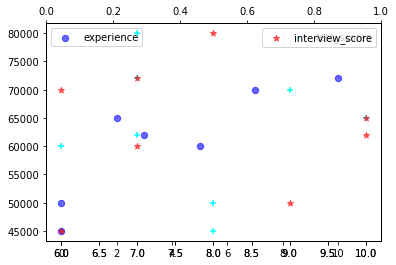

In [26]:
%matplotlib inline

fig, AXexp = plt.subplots()
AXtest_score = plt.twiny(ax=AXexp)
AXinterview_score = plt.twiny(ax=AXtest_score)
AY_salary = plt.twiny(ax=AXinterview_score)

AXexp.scatter(X[["experience"]], y, color='b', alpha=0.6, marker='o', s=40, label="experience")
AXtest_score.scatter(X[["test_scores"]], y, color='cyan', alpha=1, marker='+', s=40, label="test_scores")
AXinterview_score.scatter(X[["interview_score"]], y, color='r', alpha=0.6, marker='*', s=40, label="interview_score")

AXexp.legend()
AXinterview_score.legend()
AXtest_score.legend()

In [8]:
reg = LinearRegression(normalize=True)
reg.fit(X, y)

LinearRegression(normalize=True)

In [9]:
print ("score/price/cost:", reg.score(X, y))
print ("thetas/m/slope:", reg.coef_)
print ("y intercept/b:", reg.intercept_)

score/price/cost: 0.9770139014273139
thetas/m/slope: [[2922.26901502 2221.30909959 2147.48256637]]
y intercept/b: [14992.65144669]


In [10]:
print ("2y 9ts 6is: ", reg.predict([[2,9,6]]))
print ("12y 10ts 10is:", reg.predict([[12,10,10]]))

2y 9ts 6is:  [[53713.86677124]]
12y 10ts 10is: [[93747.79628651]]


## Line is not overfitting it is coming like this because we are drawing it with experience as X but we trained with all the 3 features not only X

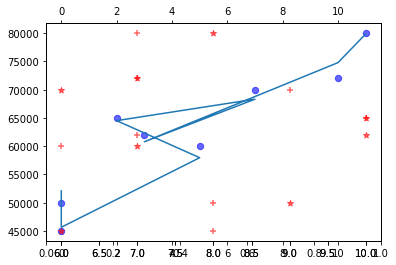

In [11]:
%matplotlib inline

fig, AXexp = plt.subplots()
AXtest_score = plt.twiny(ax=AXexp)
AXinterview_score = plt.twiny(ax=AXtest_score)
AY_salary = plt.twiny(ax=AXinterview_score)
LINE = plt.twiny(ax=AY_salary)

AXexp.scatter(X[["experience"]], y, color='b', alpha=0.6, marker='o', s=40, label="experience")
AXtest_score.scatter(X[["test_scores"]], y, color='r', alpha=0.6, marker='+', s=40, label="test_scores")
AXinterview_score.scatter(X[["interview_score"]], y, color='r', alpha=0.6, marker='*', s=40, label="interview_score")
LINE.plot(X[["experience"]], reg.predict(X))

In [27]:
reg.predict(X)

array([[52090.46734071],
       [45648.01964161],
       [57964.2290839 ],
       [64525.1061363 ],
       [68325.21184635],
       [60783.44785255],
       [74796.8832586 ],
       [79866.63483999]])